In [1]:
import tushare as ts
import numpy as np
import pandas as pd
token = '094f15d71394516b730602faa77b1c708007b8d05df300590b4445ed'
ts.set_token(token)
pro=ts.pro_api()

In [2]:
stock_list = ['000001.SZ','600000.SH','600015.SH','600016.SH','600036.SH','601166.SH',
              '601288.SH','601328.SH','601398.SH','601818.SH',
              '601939.SH','601988.SH','601998.SH']

In [3]:
from getdata import getdata

In [46]:
process = getdata(stock_list, token)
df = process.create_time_series('20160101','20201231')
process.save_df(path='./loss.csv')

## Volatility

In [5]:
import datetime as dt
from arch import arch_model
import pandas_datareader.data as web

In [6]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)

In [25]:
len(df.columns)

14

In [26]:
df.index = df['trade_date']
df.index = pd.to_datetime(df.index)
df

,trade_date,loss000001.SZ,loss600000.SH,loss600015.SH,loss600016.SH,loss600036.SH,loss601166.SH,loss601288.SH,loss601328.SH,loss601398.SH,loss601818.SH,loss601939.SH,loss601988.SH,loss601998.SH
trade_date,,,,,,,,,,,,,,
2016-01-04,2016-01-04,-5.661889,-2.606191,-6.026431,-6.536874,-4.026628,-3.821360,-3.464914,-5.916994,-2.879490,-4.338030,-3.163708,-3.553673,-6.583206
2016-01-05,2016-01-05,0.615928,0.894861,0.523561,0.991744,-0.289771,1.390170,1.273903,1.471817,0.448431,0.491401,-0.357782,-0.258732,0.000000
2016-01-06,2016-01-06,1.133898,0.776488,0.173913,0.328408,0.463232,0.538762,0.630917,0.808412,0.890874,1.218042,1.069529,0.774197,1.176484
2016-01-07,2016-01-07,-5.252654,-3.313979,-7.017267,-6.199168,-3.767367,-2.539435,-2.225847,-4.445176,-1.789757,-4.203338,-2.695581,-2.604314,-6.805346
2016-01-08,2016-01-08,1.631949,-0.114286,0.927650,1.156082,0.836325,0.671348,1.594930,1.503788,0.674918,1.752235,0.906625,0.263505,2.167267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,2020-12-25,-1.212136,0.313644,0.000000,0.775198,0.351741,0.198118,0.317965,0.224972,0.201410,-0.772205,0.000000,0.314961,0.000000
2020-12-28,2020-12-28,4.392140,-0.104439,-0.487410,-0.386848,0.746272,1.375943,-0.317965,0.000000,0.000000,1.028287,-0.479617,-0.314961,0.000000
2020-12-29,2020-12-29,1.683364,-0.418849,0.162734,0.000000,-0.489112,0.680936,0.000000,0.224467,0.201005,0.255428,0.160128,0.000000,0.000000


## 计算出 Volatility

In [52]:
from scipy.stats import norm
norm.ppf(0.95,loc=0,scale=1)

1.6448536269514722

In [105]:
dt.datetime(2000,1,1)

datetime.datetime(2000, 1, 1, 0, 0)

In [91]:
df.index = pd.to_datetime(df.index)

In [101]:
am = arch_model(df[df.columns[2]], mean='AR', lags=2, vol='Garch', p=1, o=0, q=1, dist='Normal')
res = am.fit(disp = 'off', last_obs = '2017-1-1')

In [103]:
forecasts = res.forecast(start = '2017-1-4')
cond_mean = forecasts.mean['2018':]
cond_var = forecasts.variance['2018':]
q = am.distribution.ppf(0.05, res.params[-2:])

ValueError: parameters must have 0 elements

In [104]:
cond_mean

,h.1


In [96]:
VaR_df = pd.DataFrame(df['trade_date'])

for i in range(len(df.columns)-1):
    am = arch_model(df[df.columns[i+1]], mean='AR', lags=2, vol='Garch', p=1, o=0, q=1, dist='Normal')
    res = am.fit(disp = 'off', last_obs = '2016-01-04')
    forecasts = res.forecast(start = '2016-01-04')
    cond_mean = forecasts.mean['2016':]
    cond_var = forecasts.variance['2016':]
    q = am.distribution.ppf(0.05, res.params[-2:])
    VaR = -cond_mean.values - np.sqrt(cond_var).values * q
    VaR.rename('VaR'+stock_list[i], inplace=True)
    temp_df = pd.DataFrame(VaR)
    VaR_df = pd.merge(VaR_df, temp_df, left_index = True, right_index=True)
VaR_df

ValueError: parameters must have 0 elements

In [61]:
VaR_df = pd.DataFrame(df['trade_date'])

for i in range(len(df.columns)-1):
    am = arch_model(df[df.columns[i+1]], mean='AR', lags=2, vol='Garch', p=1, o=0, q=1, dist='Normal')
    res = am.fit()
    volatility = res.conditional_volatility
    VaR = norm.ppf(0.95,loc=0,scale=1)*np.sqrt(volatility)
    VaR.rename('VaR'+stock_list[i], inplace=True)
    temp_df = pd.DataFrame(VaR)
    VaR_df = pd.merge(VaR_df, temp_df, left_index = True, right_index=True)
VaR_df

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4633342.127767509
Iteration:      2,   Func. Count:     18,   Neg. LLF: 79633.73145958969
Iteration:      3,   Func. Count:     28,   Neg. LLF: 526646.7805548296
Iteration:      4,   Func. Count:     38,   Neg. LLF: 2332.411004924652
Iteration:      5,   Func. Count:     46,   Neg. LLF: 2327.8538302506136
Iteration:      6,   Func. Count:     54,   Neg. LLF: 3983.2825971080183
Iteration:      7,   Func. Count:     63,   Neg. LLF: 2320.0952373941327
Iteration:      8,   Func. Count:     71,   Neg. LLF: 2313.81163394433
Iteration:      9,   Func. Count:     78,   Neg. LLF: 2317.47127626937
Iteration:     10,   Func. Count:     87,   Neg. LLF: 3120.6735533668316
Iteration:     11,   Func. Count:     96,   Neg. LLF: 2327.1855406511154
Iteration:     12,   Func. Count:    104,   Neg. LLF: 2313.656506208251
Iteration:     13,   Func. Count:    112,   Neg. LLF: 2313.6307075785417
Iteration:     14,   Func. Count:    119,   Neg. LLF: 2313.6

Iteration:     14,   Func. Count:    115,   Neg. LLF: 1954.4744189269718
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1954.4744189261062
            Iterations: 14
            Function evaluations: 115
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      8,   Neg. LLF: 7247.262176781571
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6915.502652697137
Iteration:      3,   Func. Count:     29,   Neg. LLF: 2105.8681589222742
Iteration:      4,   Func. Count:     37,   Neg. LLF: 3259.306563552045
Iteration:      5,   Func. Count:     46,   Neg. LLF: 2007.6037898099487
Iteration:      6,   Func. Count:     54,   Neg. LLF: 1944.4749598840158
Iteration:      7,   Func. Count:     62,   Neg. LLF: 477614988.28163064
Iteration:      8,   Func. Count:     70,   Neg. LLF: 2256.0960561552547
Iteration:      9,   Func. Count:     79,   Neg. LLF: 1939.605502572157
Iteration:     10,   Func. Count:     86,   Neg. LLF: 1939.6046

,trade_date,VaR000001.SZ,VaR600000.SH,VaR600015.SH,VaR600016.SH,VaR600036.SH,VaR601166.SH,VaR601288.SH,VaR601328.SH,VaR601398.SH,VaR601818.SH,VaR601939.SH,VaR601988.SH,VaR601998.SH
0,2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,2.419523,2.492153,2.540876,2.172908,2.289582,2.071975,1.964041,2.316224,1.904433,2.342395,2.155921,2.197561,2.632122
3,2016-01-07,2.398209,2.332837,2.388979,2.015409,2.262049,2.017567,1.913597,2.224460,1.862071,2.279193,2.090759,2.093710,2.527383
4,2016-01-08,2.589297,2.503936,3.037919,2.906629,2.342319,2.145124,2.011693,2.507676,1.956754,2.533953,2.241957,2.219646,3.109616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,2020-12-25,2.147720,1.643018,1.508476,1.480671,2.223258,2.108060,1.376252,1.467670,1.540860,1.981852,1.809789,1.363543,1.633050
1190,2020-12-28,2.136800,1.611216,1.478105,1.514504,2.195877,2.037822,1.357740,1.447501,1.488433,1.931487,1.746061,1.344867,1.597503
1191,2020-12-29,2.313820,1.574630,1.475137,1.479562,2.172135,2.014781,1.342534,1.426250,1.439363,1.907431,1.706343,1.333826,1.569096
1192,2020-12-30,2.300403,1.562996,1.455218,1.437822,2.148871,1.960234,1.318286,1.412734,1.400271,1.841902,1.656566,1.308660,1.546458


In [62]:
VaR_df.set_index(['trade_date'], inplace=True)

In [63]:
VaR_df

,VaR000001.SZ,VaR600000.SH,VaR600015.SH,VaR600016.SH,VaR600036.SH,VaR601166.SH,VaR601288.SH,VaR601328.SH,VaR601398.SH,VaR601818.SH,VaR601939.SH,VaR601988.SH,VaR601998.SH
trade_date,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,2.419523,2.492153,2.540876,2.172908,2.289582,2.071975,1.964041,2.316224,1.904433,2.342395,2.155921,2.197561,2.632122
2016-01-07,2.398209,2.332837,2.388979,2.015409,2.262049,2.017567,1.913597,2.224460,1.862071,2.279193,2.090759,2.093710,2.527383
2016-01-08,2.589297,2.503936,3.037919,2.906629,2.342319,2.145124,2.011693,2.507676,1.956754,2.533953,2.241957,2.219646,3.109616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,2.147720,1.643018,1.508476,1.480671,2.223258,2.108060,1.376252,1.467670,1.540860,1.981852,1.809789,1.363543,1.633050
2020-12-28,2.136800,1.611216,1.478105,1.514504,2.195877,2.037822,1.357740,1.447501,1.488433,1.931487,1.746061,1.344867,1.597503
2020-12-29,2.313820,1.574630,1.475137,1.479562,2.172135,2.014781,1.342534,1.426250,1.439363,1.907431,1.706343,1.333826,1.569096


## 用 Volatility 算出 一天的 VaR

计算公式 $VaR_{t+1|t} = -\mu_{t+1|t}-\sigma_{t+1|t}q_{\alpha}$

In [55]:
import matplotlib.pylab as plt
import matplotlib.dates as mdate
from matplotlib.pylab import rcParams
plt.rcParams['axes.unicode_minus']=False
rcParams['font.sans-serif'] = 'kaiti'

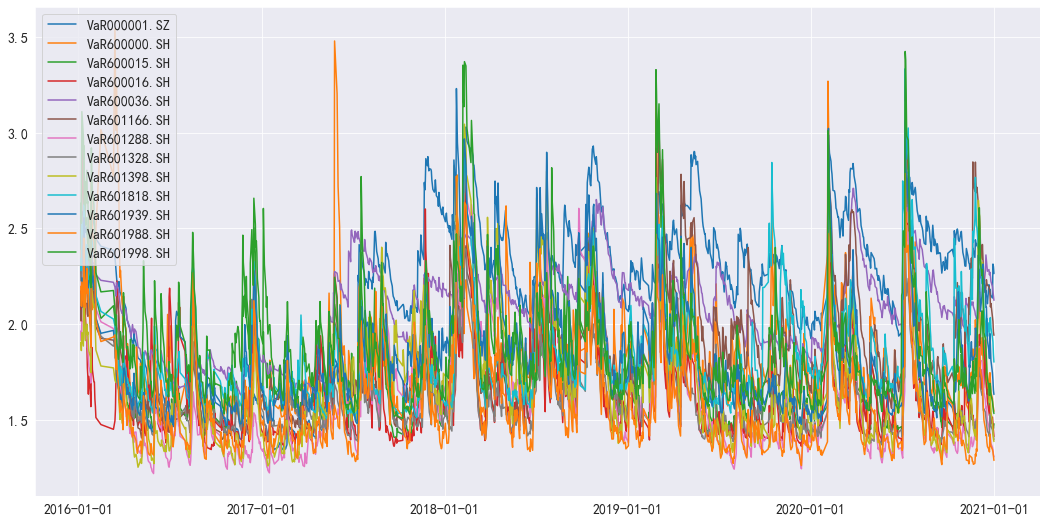

In [67]:
time = VaR_df.index
fig = plt.figure(figsize=(18,9))
ax = plt.subplot(111)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
for name in VaR_df.columns:
    ax.plot(time, VaR_df[name])

plt.legend(VaR_df.columns)
plt.show()

In [68]:
import datetime as dt
import sys

import numpy as np
import pandas as pd

from arch import arch_model
import arch.data.sp500

data = arch.data.sp500.load()
market = data['Adj Close']
returns = 100 * market.pct_change().dropna()

In [69]:
am = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='skewt')
res = am.fit(disp='off', last_obs='2017-12-31')

In [85]:
forecasts = res.forecast(start='2000-1-1')
cond_mean = forecasts.mean['2000':]
cond_var = forecasts.variance['2000':]
q = am.distribution.ppf(0.05, res.params[-2:])
print(q)

-1.649659636247992


In [82]:
q = am.distribution.ppf(0.05, res.params[-2:])

In [86]:
VaR = -cond_mean.values - np.sqrt(cond_var).values*q
VaR = pd.DataFrame(VaR, columns=['5%'], index = cond_var.index)


In [87]:
VaR

,5%
Date,
2000-01-03,1.190602
2000-01-04,2.243784
2000-01-05,2.137302
2000-01-06,2.035234
2000-01-07,2.348485
...,...
2018-12-24,2.717002
2018-12-26,3.567311
2018-12-27,3.417005


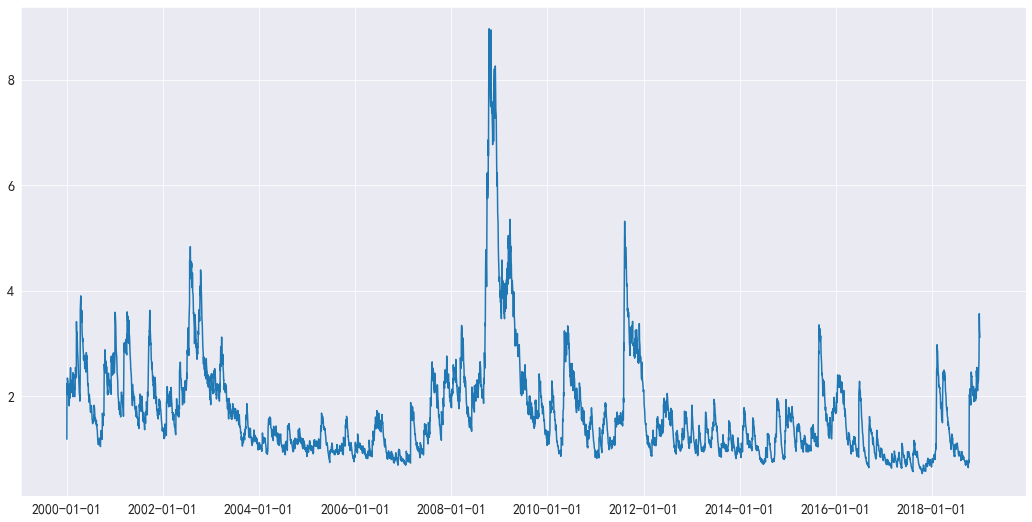

In [89]:
time = VaR.index
fig = plt.figure(figsize=(18,9))
ax = plt.subplot(111)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
ax.plot(time, VaR['5%'])
plt.show()

In [1]:
import numpy as np

In [18]:
x = np.ones(3)
y = 3*np.ones(3)
x*y

array([3., 3., 3.])

In [6]:
(x>0)*y

array([3., 3., 3.])

In [21]:
z = np.vstack((x,y))
z[0,]

array([1., 1., 1.])

In [9]:
from scipy.optimize import minimize

In [11]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

In [26]:
p=np.ones(3)
o=np.zeros(1)
np.hstack((p,0))

array([1., 1., 1., 0.])

In [27]:
x[0:-2]

array([1.])

In [28]:
x[0:-1]

array([1., 1.])

In [29]:
x[2]=3
x

array([1., 1., 3.])

In [30]:
x[-1]

3.0